In [19]:
import pandas as pd

# Load the dataset
data2 = pd.read_csv('data2.csv')

# Display the first few rows to inspect the data
print(data2.head())


        Date  Victimisations        AgeGroup              AnzsocDivision  \
0  1/01/2024               1  Not Applicable  Theft and Related Offences   
1  1/01/2024               2  Not Applicable  Theft and Related Offences   
2  1/01/2024               1  Not Applicable  Theft and Related Offences   
3  1/01/2024               1  Not Applicable  Theft and Related Offences   
4  1/01/2024               1  Not Applicable  Theft and Related Offences   

      LocationType             PoliceArea             ROVDivision  \
0     Public Place      Waikato West Area  No Offender Identified   
1  Street/Footpath       Hutt Valley Area  No Offender Identified   
2  Street/Footpath       Hutt Valley Area  No Offender Identified   
3  Street/Footpath  Canterbury Rural Area  No Offender Identified   
4  Street/Footpath        Tairawhiti Area  No Offender Identified   

    TerritorialAuthority PersonOrOrganization  
0      Waikato District.         Organisation  
1       Upper Hutt City.        

In [20]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Convert categorical columns to numerical values
data2['AgeGroup'] = le.fit_transform(data2['AgeGroup'])
data2['AnzsocDivision'] = le.fit_transform(data2['AnzsocDivision'])
data2['LocationType'] = le.fit_transform(data2['LocationType'])
data2['PoliceArea'] = le.fit_transform(data2['PoliceArea'])
data2['ROVDivision'] = le.fit_transform(data2['ROVDivision'])
data2['TerritorialAuthority'] = le.fit_transform(data2['TerritorialAuthority'])
data2['PersonOrOrganization'] = le.fit_transform(data2['PersonOrOrganization'])

# Display the updated data
print(data2.head())


        Date  Victimisations  AgeGroup  AnzsocDivision  LocationType  \
0  1/01/2024               1         2               4            22   
1  1/01/2024               2         2               4            29   
2  1/01/2024               1         2               4            29   
3  1/01/2024               1         2               4            29   
4  1/01/2024               1         2               4            29   

   PoliceArea  ROVDivision  TerritorialAuthority  PersonOrOrganization  
0          29            1                    55                     0  
1          14            1                    54                     0  
2          14            1                    54                     0  
3           5            1                    56                     0  
4          25            1                    12                     0  


In [21]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = data2[['AgeGroup', 'AnzsocDivision', 'LocationType', 'PoliceArea', 'ROVDivision', 'TerritorialAuthority', 'PersonOrOrganization']]
y = data2['Victimisations']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=5, random_state=123)

# Train the model
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=123)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test data
y_pred = tree_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display the confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 71.34%
[[10559     0     0 ...     0     0     0]
 [ 1905     0     0 ...     0     0     0]
 [  690     0     0 ...     0     0     0]
 ...
 [    1     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]]


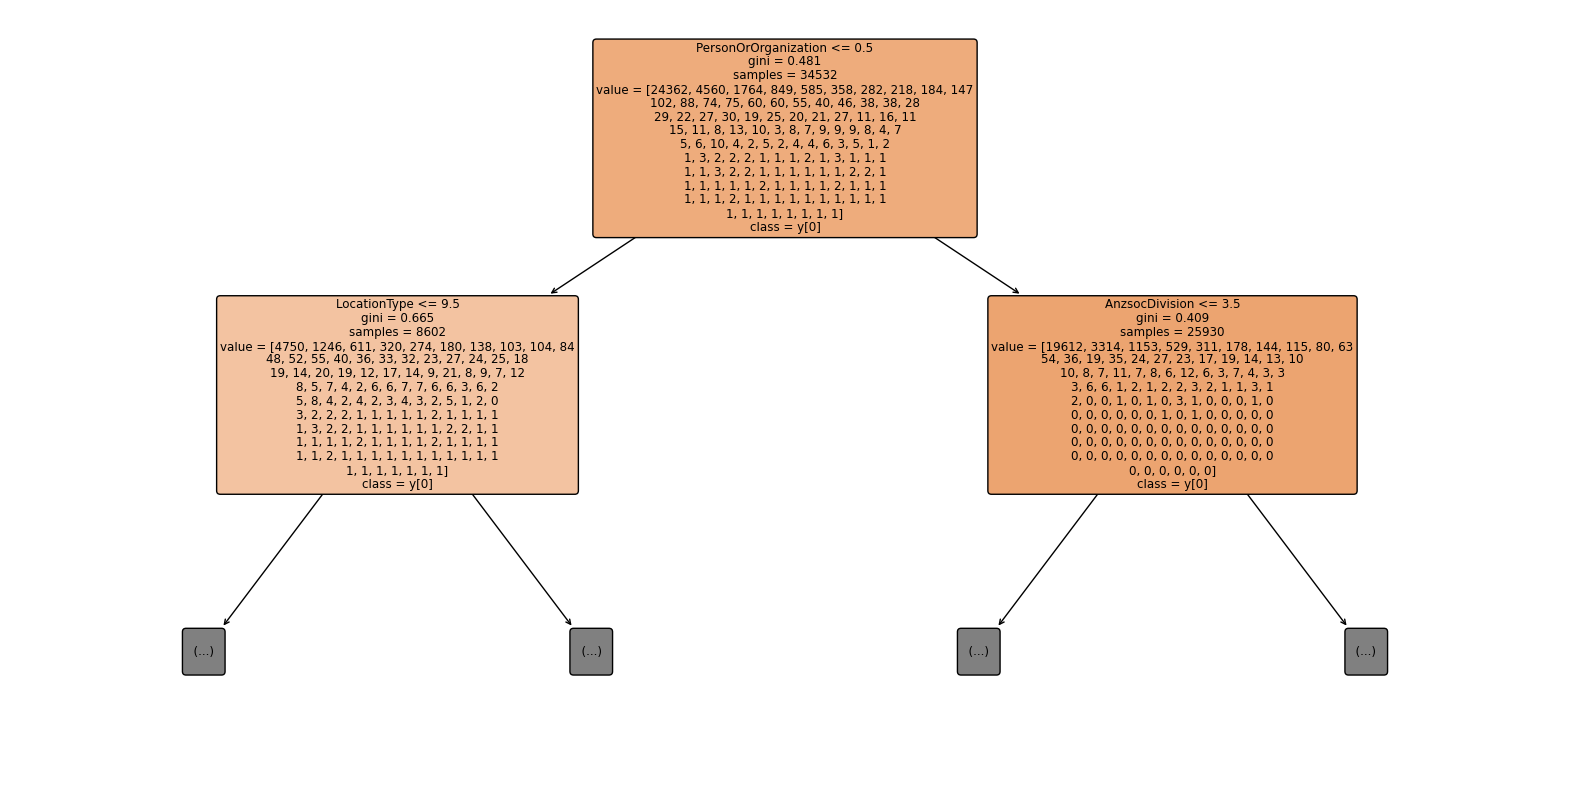

In [25]:

from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(10,10))
tree.plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=True, rounded=True, max_depth=1)
plt.show()
